<a href="https://colab.research.google.com/github/ragaashritha/Project-9/blob/master/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


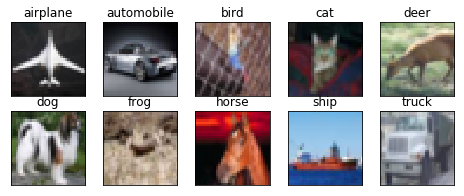

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
num_classes

10

In [12]:
# Define the model
model = Sequential()

model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #RF- 3x3, o/p - 32x32x48
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3,border_mode='same')) #RF - 5x5, o/p - 32x32x48
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #RF - 10x10, o/p - 16x16x48
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))#RF - 12x12, o/p - 16x16x96 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3,border_mode='same'))#RF - 14x14, o/p - 16x16x96
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))#RF - 28x28 ,o/p - 8x8x96
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))#RF - 30x30, o/p -  8x8x192
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(192, 3, 3,border_mode='same'))#RF - 32x32 ,o/p - 8x8x192
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10,1,1))
model.add(Convolution2D(10,8,8))
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0625 17:56:11.070500 139872633784192 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 48)        0         
__________

Epoch 1/100
  3/390 [..............................] - ETA: 17s - loss: 0.2748 - acc: 0.8854

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


390/390 [==============================] - 14s 35ms/step - loss: 0.3654 - acc: 0.8723 - val_loss: 0.8899 - val_acc: 0.7453

Epoch 00001: val_acc improved from -inf to 0.74530, saving model to model.01-0.89.hdf5
Epoch 2/100
390/390 [==============================] - 14s 35ms/step - loss: 0.3213 - acc: 0.8858 - val_loss: 0.5954 - val_acc: 0.8136

Epoch 00002: val_acc improved from 0.74530 to 0.81360, saving model to model.02-0.60.hdf5
Epoch 3/100
390/390 [==============================] - 14s 35ms/step - loss: 0.2769 - acc: 0.9008 - val_loss: 0.6681 - val_acc: 0.8003

Epoch 00003: val_acc did not improve from 0.81360
Epoch 4/100
390/390 [==============================] - 14s 35ms/step - loss: 0.2504 - acc: 0.9097 - val_loss: 0.6484 - val_acc: 0.8095

Epoch 00004: val_acc did not improve from 0.81360
Epoch 5/100
390/390 [==============================] - 14s 35ms/step - loss: 0.2245 - acc: 0.9190 - val_loss: 0.7886 - val_acc: 0.7889

Epoch 00005: val_acc did not improve from 0.81360
Epoch

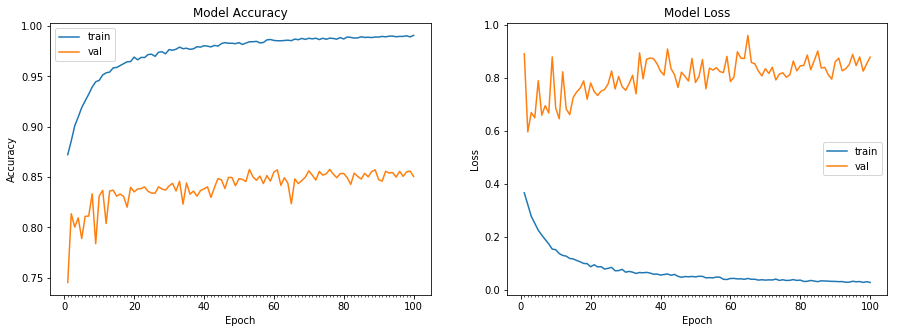

Accuracy on test data is: 85.06


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import LearningRateScheduler,ModelCheckpoint


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()

model_path = 'model.{epoch:02d}-{val_loss:.2f}.hdf5'
callbacks = [
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]

# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch =100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

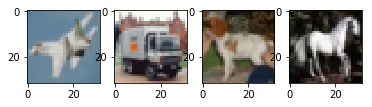

In [164]:
f, axarr = plt.subplots(1,4)
axarr[0].imshow(test_features[10])
axarr[1].imshow(test_features[11])
axarr[2].imshow(test_features[12])
axarr[3].imshow(test_features[13])

In [0]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2

In [0]:
import copy
img = copy.deepcopy(test_features[10])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
from keras.models import load_model 
model = load_model('model.53-0.76.hdf5')

preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]

In [0]:
last_conv_layer = model.get_layer("conv2d_12")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [169]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from google.colab.patches import cv2_imshow

W0625 19:31:33.320512 139872633784192 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-1

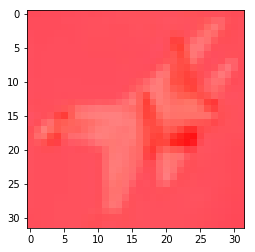

In [171]:
img = copy.deepcopy(test_features[10])
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

heatmap = heatmap.astype(np.float32)

superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(img)
plt.imshow(superimposed_img)
cv2.waitKey(0)

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 17s 44ms/step - loss: 0.3412 - acc: 0.8911 - val_loss: 0.5923 - val_acc: 0.8488

Epoch 00001: val_acc improved from -inf to 0.84880, saving model to model.01-0.59.hdf5
Epoch 2/100
390/390 [==============================] - 14s 36ms/step - loss: 0.2487 - acc: 0.9142 - val_loss: 0.6607 - val_acc: 0.8342

Epoch 00002: val_acc did not improve from 0.84880
Epoch 3/100
390/390 [==============================] - 14s 36ms/step - loss: 0.2261 - acc: 0.9212 - val_loss: 0.5536 - val_acc: 0.8556

Epoch 00003: val_acc improved from 0.84880 to 0.85560, saving model to model.03-0.55.hdf5
Epoch 4/100
390/390 [==============================] - 14s 37ms/step - loss: 0.2109 - acc: 0.9264 - val_loss: 0.5919 - val_acc: 0.8514

Epoch 00004: val_acc did not improve from 0.85560
Epoch 5/100
390/390 [==============================] - 14s 36ms/step - loss: 0.2006 - acc: 0.9302 - val_loss: 0.5788 - val_acc: 0.8556

Epoch 00005: val_acc did not improve from 0

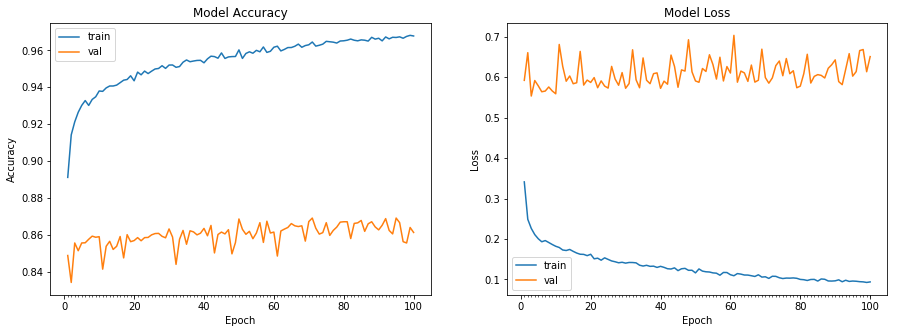

Accuracy on test data is: 86.13


In [179]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import LearningRateScheduler,ModelCheckpoint


datagen = ImageDataGenerator(zoom_range=0.0, preprocessing_function=get_random_eraser(v_l=0, v_h=1),
                             horizontal_flip=False)


# train the model
start = time.time()

model_path = 'model.{epoch:02d}-{val_loss:.2f}.hdf5'
callbacks = [
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        mode='max',
        verbose=1)
]

# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch =100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
import copy
img = copy.deepcopy(test_features[10])
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
W0625 19:59:16.230581 139872633784192 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-1

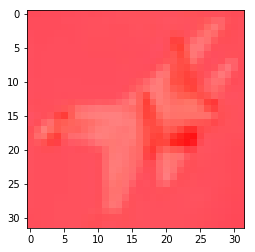

In [181]:
from keras.models import load_model 
model = load_model('model.71-0.59.hdf5')

preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]

last_conv_layer = model.get_layer("conv2d_12")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(192):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = copy.deepcopy(test_features[10])
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

heatmap = heatmap.astype(np.float32)

superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.imshow(img)
plt.imshow(superimposed_img)
cv2.waitKey(0)
